### Nombre: Juan Pablo Jorquera Zapata
### Rol: 201573533-6

# INF391 - Tarea 1

En cada conjunto de puntos en dos dimensiones, ejecute el algoritmo **K-Means** con el parámetro $K$ dado a continuación. Muestre los clusters que se generan, indicando donde se ubica cada centroide. Comente si es la agrupación "natural" que usted pensaría al mirar el dataset. En caso que no lo sea, explique la razón.
1.   $K=3$
2.   $K=3$
3.   $K=2$
4.   $K=3$

In [1]:
# Librerías útiles
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn.cluster import KMeans

In [2]:
# Cargar los datos
d1 = genfromtxt('T1-1.csv', delimiter=',')
d2 = genfromtxt('T1-2.csv', delimiter=',')
d3 = genfromtxt('T1-3.csv', delimiter=',')
d4 = genfromtxt('T1-4.csv', delimiter=',')

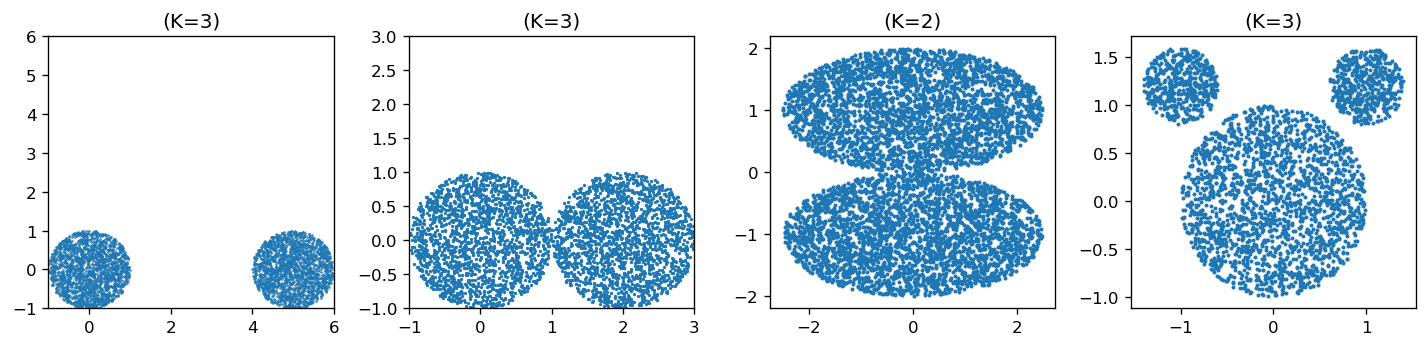

In [3]:
# Crear Figuras
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(12,3), dpi=120)

# Plot
ax1.scatter(d1[:,0], d1[:,1], s=1, marker=".")
ax2.scatter(d2[:,0], d2[:,1], s=1) 
ax3.scatter(d3[:,0], d3[:,1], s=2) 
ax4.scatter(d4[:,0], d4[:,1], s=2)

ax1.set_title('(K=3)')
ax2.set_title('(K=3)')
ax3.set_title('(K=2)')
ax4.set_title('(K=3)')

ax1.set_xlim(-1,6)
ax1.set_ylim(-1,6)

ax2.set_xlim(-1,3)
ax2.set_ylim(-1,3)

plt.tight_layout()
plt.show()

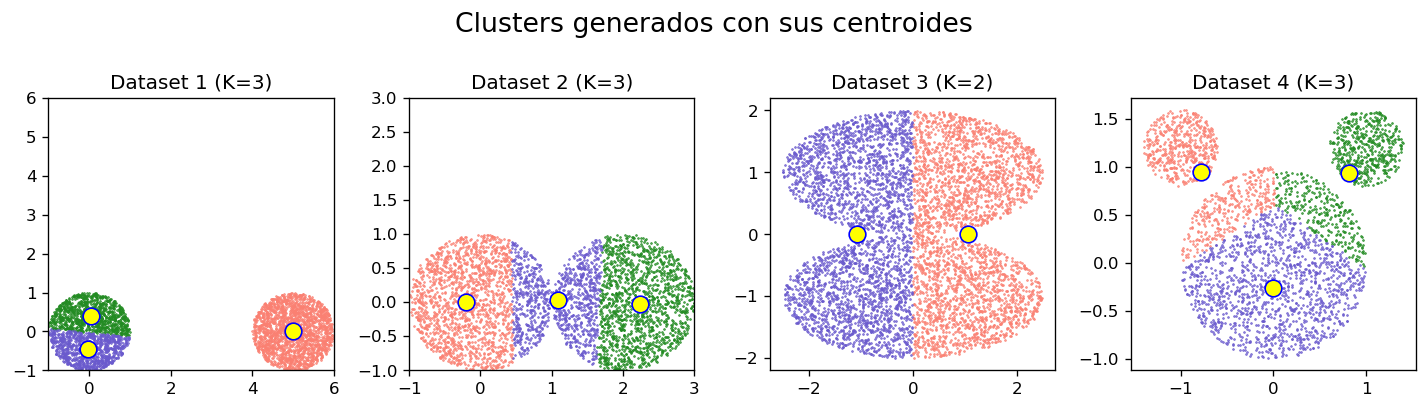

In [45]:
# Setear cantidad clusters para cada caso
k1 = 3
k2 = 3
k3 = 2
k4 = 3

# Aplicar K-Means al dataset 1
kMeans1 = KMeans(n_clusters=k1, random_state=81)
y_km1 = kMeans1.fit_predict(d1)
centers1 = kMeans1.cluster_centers_

# Aplicar K-Means al dataset 2
kMeans2 = KMeans(n_clusters=k2, random_state=7)
y_km2 = kMeans2.fit_predict(d2)
centers2 = kMeans2.cluster_centers_

# Aplicar K-Means al dataset 3
kMeans3 = KMeans(n_clusters=k3, random_state=15)
y_km3 = kMeans3.fit_predict(d3)
centers3 = kMeans3.cluster_centers_

# Aplicar K-Means al dataset 4
kMeans4 = KMeans(n_clusters=k4, random_state=106)
y_km4 = kMeans4.fit_predict(d4)
centers4 = kMeans4.cluster_centers_

# Crear Figuras
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(12,3), dpi=120)

## Plotear
# Plot dataset 1
ax1.scatter(d1[y_km1 == 0,0], d1[y_km1 == 0,1], s=1, marker=".", c="salmon")
ax1.scatter(d1[y_km1 == 1,0], d1[y_km1 == 1,1], s=1, marker=".", c="forestgreen")
ax1.scatter(d1[y_km1 == 2,0], d1[y_km1 == 2,1], s=1, marker=".", c="slateblue")
ax1.scatter(centers1[:,0], centers1[:,1], s=100, marker="o", c="yellow", edgecolors="b")

# Plot dataset 2
ax2.scatter(d2[y_km2 == 0,0], d2[y_km2 == 0,1], s=1, marker=".", c="salmon")
ax2.scatter(d2[y_km2 == 1,0], d2[y_km2 == 1,1], s=1, marker=".", c="forestgreen")
ax2.scatter(d2[y_km2 == 2,0], d2[y_km2 == 2,1], s=1, marker=".", c="slateblue")
ax2.scatter(centers2[:,0], centers2[:,1], s=100, marker="o", c="yellow", edgecolors="b")

# Plot dataset 3
ax3.scatter(d3[y_km3 == 0,0], d3[y_km3 == 0,1], s=1, marker=".", c="salmon")
ax3.scatter(d3[y_km3 == 1,0], d3[y_km3 == 1,1], s=1, marker=".", c="slateblue")
ax3.scatter(centers3[:,0], centers3[:,1], s=100, marker="o", c="yellow", edgecolors="b")

# Plot dataset 4
ax4.scatter(d4[y_km4 == 0,0], d4[y_km4 == 0,1], s=1, marker=".", c="salmon")
ax4.scatter(d4[y_km4 == 1,0], d4[y_km4 == 1,1], s=1, marker=".", c="forestgreen")
ax4.scatter(d4[y_km4 == 2,0], d4[y_km4 == 2,1], s=1, marker=".", c="slateblue")
ax4.scatter(centers4[:,0], centers4[:,1], s=100, marker="o", c="yellow", edgecolors="b")

ax1.set_title('Dataset 1 (K=3)')
ax2.set_title('Dataset 2 (K=3)')
ax3.set_title('Dataset 3 (K=2)')
ax4.set_title('Dataset 4 (K=3)')

ax1.set_xlim(-1,6)
ax1.set_ylim(-1,6)

ax2.set_xlim(-1,3)
ax2.set_ylim(-1,3)

plt.suptitle("Clusters generados con sus centroides", fontsize=16, y=1.12)
plt.tight_layout()
plt.show()

### Análisis

En primer lugar, se puede ver inmediatamente que los clusters generados no eran lo esperado, lo que se nota mejor viendo los casos 3 y 4, en donde se esperaba que fueran las dos elipses y las circunferencias separadas en cada figura respectivamente. La generación de estos clusters se explica, ya que el algoritmo se mide en base al **SSE**, con la distancia euclidiana, es decir, los clusters generan una menor distancia al designarlos como se ve en las figuras. Para la figura 3, si se hubieran tomado los elipses como clusters, claramente la distancia a lo ancho en cada cluster sería mucho mayor a la distancias verticales que se obtuvieron. Igualmente en la figura 4, si se hubiera tomado la circunferencia grande, la distancia de los puntos más externos a la circunferencia a su centro resultaría mayor y como las otras circunferencias se encuentran cerca, tiene sentido asignar las partes cercanas a centroides en las circunferencias pequeñas.

En el mismo sentido, para las figuras 1 y 2 se notó que se generan clusters muy distintos pese a ser figuras similares. Esto se debe a la gran distancia que hay entre las circunferencias en 1 a diferencias de aquellas en 2, ya que en 2 el centroide de al medio genera bajas distancias hacia los puntos de ambas circunferencias, en cambio en 1 la distancia es mayor al tamaño de las circunferencias. Para terminar, se notó que en la figura 1 los clusters generados siempre dividía la circunferencia de la izquierda por la mitad y no la de la derecha (se probó con varias semillas distintas), lo que se puede deber simplemente a la aleatoriedad del algoritmo en la selección inicial de puntos, o bien a la varianza de las dispersión de cada circunferencia, que no se puede notar a simple vista en la figura.